# Machine Learning Engineer Nanodegree

## Capstone Project

Allstate Claims Severity - Kaggle Contest

Siddartha Tondapu
December 10, 2017

## I. Definition

### Project Overview
Automobile accidents are involuntary and are often unexpected. Nearly 1.3 million people in the world and 37,000 people in the United States alone lose their life in these tragic accidents. While these are major accidents, there are many minor accidents and fender benders that cause devastating psychological damages. During these times, the victim wants to focus more time on his family, friends, and loved ones than to deal with insurance claims. Unfortunately, I was involved in a small fender bender recently, and I felt the whole process of claiming for insurance to be long and tedious. With so many accidents happening every day, I realized there can be better ways to make the whole process quick and seamless.

### Problem Statement

Allstate, an insurance company, saw this as a bottleneck and decided to automate the whole process by predicting the cost and severity of the claim. Our goal in this project is to use machine learning algorithms to model the cost and severity of a claim. We have been given some input variables (both continuous and discrete/categorical). Using these input variables, we will be predicting the output cost of the claim by using a regression model. Since cost is a continuous value, we will use a piecewise function to define the severity.
For example:
- cost of claim is < 1000 =  minor severity
- cost of claim > 1000 and < 5000 = medium severity
- cost of claim > 5000 = major severity


### Metrics
Using the feature labels provided, we will use a linear regression model to predict the outcome, which in this case is the cost associated to a claim. Our model will be used to predict the test data. The predicted results with be compared with the actual results using mean absolute error (MAE). MAE is calculated by subtracting predict error from actual error, find the absolute value, and eventually the mean/average of these numbers. This can be compared with average results of Kaggle submissions, which happens to be 1222.24.

In [15]:
# Import required modules
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline
# Find the Baseline Score that we compare with our model results
base_model = pd.read_csv('Data/allstate-claims-severity-publicleaderboard.csv')

# Drop Scores greater than 5000
base_model = base_model.drop(base_model[base_model.Score > 5000].index)

# Mean of scores
print (base_model['Score'].mean())

1222.23689139


## II. Analysis

### Data Exploration
The code cell below will import all required modules and dataset required for this project.

In [16]:
# Load the Boston housing dataset
data = pd.read_csv('Data/train.csv')
loss = data['loss']
features = data.drop(['id','loss'], axis = 1)

print "Allstate dataset has {} data points with {} variables each.".format(*data.shape)

# Success - Display the first record
display(data.head(n=1))

Allstate dataset has 188318 data points with 132 variables each.


,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.33506,0.3026,0.67135,0.8351,0.569745,0.594646,0.822493,0.714843,2213.18


Upon observing the data, we can see that the labels are ambigious as most of them either start with cat* or cont*. In addition, there are 14 continous features and 116 categorical features. The target feature loss is a continous value.
Note: We have removed 'id' column, because its not useful in predicting the loss value.

The code cell below will find some statistical information on the target value: loss


In [3]:
print(data.skew())

# Minimum loss of the data
minimum_loss = np.amin(loss)

# TODO: Maximum loss of the data
maximum_loss = np.amax(loss)

# TODO: Mean loss of the data
mean_loss = np.mean(loss)

# TODO: Median loss of the data
median_loss = np.median(loss)

# TODO: Standard deviation of loss of the data
std_loss = np.std(loss)

# Show the calculated statistics
print "Minimum price: ${:,.2f}".format(minimum_loss)
print "Maximum price: ${:,.2f}".format(maximum_loss)
print "Mean price: ${:,.2f}".format(mean_loss)
print "Median price ${:,.2f}".format(median_loss)
print "Standard deviation of prices: ${:,.2f}".format(std_loss)

id       -0.002155
cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64
Minimum price: $0.67
Maximum price: $121,012.25
Mean price: $3,037.34
Median price $2,115.57
Standard deviation of prices: $2,904.08


Based on the statstics above, we can see that loss variable is very skewed. In addition, the min and max values are very far apart from mean suggesting many outliers than can be removed.

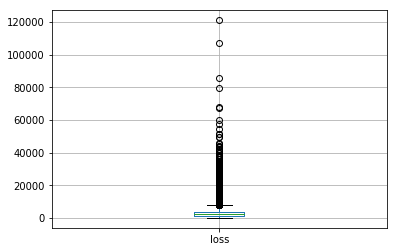

In [15]:
# Boxplot of loss variable
loss.plot.box(grid=True)

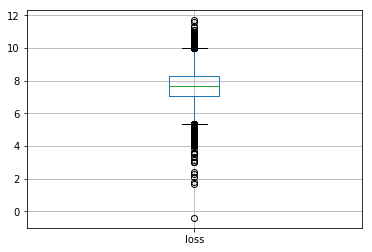

In [17]:
# Boxplot of log(loss) variable
loss_log = np.log(loss)
loss_log.plot.box(grid=True)

As we can see from the above plots, the log of loss variable is less spread out than regular loss variable.

### Exploratory Visualization

/Users/quj291/Work/XCOM/mlnano/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


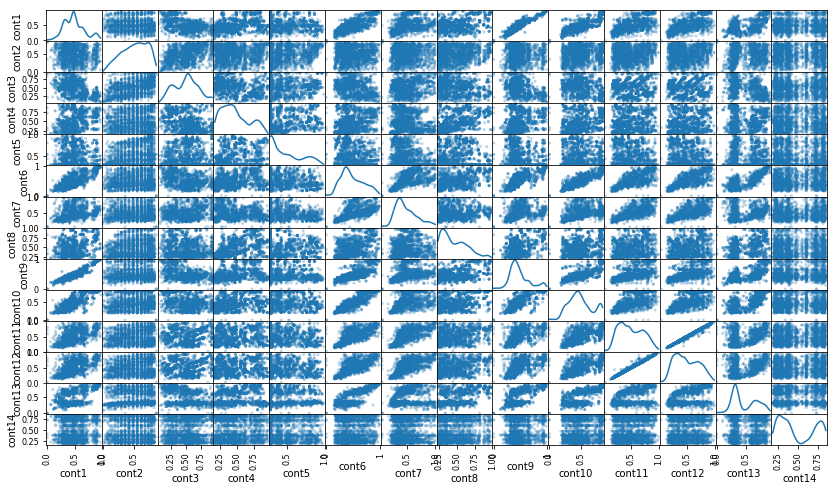

In [9]:
# See if there is any corellation beween data -> Only look at subset of data
pd.scatter_matrix(features[:2000], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

From the above scaterplot, we can see a linear relationship between (cont11 and cont12), (cont1 and cont9), (cont6 and cont10). 

### Algorithms and Techniques

As we have been mentioning before, we are using features or independent variables to determine the depent variable or the target. This is a perfect example of Supervised linear regression problem. Firstly we will split the data into two sections: Testing and Training. We will train our data with three different models listed below, and use the model to predict the target variable cost on the testing data. This will help us generalize our model on un-seen data.

#### Linear Regression 
- Application: Predicting the cost of house based on its features. 
- Strengths: Extremely fast and has low variance. We donot have to worry about correlation between independent features. Handlers outliers well and doesn't overfit easily.
- Weaknesses: Not good for non-linear relationships and results in high bias for complex models.
- Reason for choosing: Data seems to be linearly seperable. Efficient to compute. Doesn't overfit easily.

#### Decision Trees
- Application: Decision Trees are used in Data Mining.
- Strengths: Easy to visualize data for smaller levels. Data doesn't have to be linearly seperable and deals well with outliers.
- Weaknesses: Can overfit very easily on complex data and also generalizes very poorly on testing data.
- Reason for choosing: Since most of the features are categorical and ecoded as binary numbers(0 or 1) using one-hot, Decision Tree algorithm should shine in this case. It can also be used to visualize the data.

#### XGBoost
- Application: Classifying protins, text classifying.
- Strengths: Can model complex and non linear relationships and not susceptible to noice.
- Weaknesses: Slow and computation heavy. Requires large CPU and memory. Can overfit depending on the kernel.
- Reason for choosing: XGBoost shines when there are a lot of features which don't have to be linearly seperable. It's also very accurate.


### Evaluation Metrics

We will be using the average of results/scores from Kaggle submissions. Since, there are few outliers that are very huge, we will remove them from our calculation of mean (base_model_Score > 5000). Upon doing this calcuation, also found in Metrics section, the mean base model score was 1222.24. We will this score to compare our models performance. The formula to compute MAE as a function is written in the below cell.

In [18]:
from sklearn.metrics import mean_absolute_error

# returns mae given true and predicted y value
def performance_metric(y_true, y_pred):
    return mean_absolute_error(np.exp(y_true), np.exp(y_pred))

## III. Methodology


### Data Preprocessing

- Feature Scaling: Data is often not normally distributed (spread out). This is confirmed by the data we collected from Data Exploration section above for our target variable: loss. The difference between mean and median of scores is large indicating a large skew. As a result, we had to apply non-linear scaling for our loss variable. This is done above, and a new column is added to our data: log_loss. 

- Outlier Detection: Outliers are data points which are far from the mean and median. They skew the data and often result in incorrect calculations/results. In order to avoid this, we will be applying Tukey's Method for identfying outliers, where the outlier step is calculated as 1.5 times the interquartile range (IQR). Any point outside this IQR is considered as an outlier.


In [19]:
# TODO: Calculate Q1 (25th percentile of the data) for the given feature
Q1 = np.percentile(loss_log , 25)

# TODO: Calculate Q3 (75th percentile of the data) for the given feature
Q3 = np.percentile(loss_log, 75)

# TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
step = 1.5 * (Q3 - Q1)

# Display the outliers
outliers = loss_log[~((loss_log >= Q1 - step) & (loss_log <= Q3 + step))]
print "Allstate dataset has {} outliers.".format(len(outliers))

# Removing outliers from features and target
loss_log_good = loss_log.drop(outliers.index.values).reset_index(drop = True)
features_good = features.drop(outliers.index.values).reset_index(drop = True)
print "AllState dataset has {} datapoints after removing outliers".format(len(loss_log_good))



Allstate dataset has 521 outliers.
AllState dataset has 187797 datapoints after removing outliers


- Even though there we some continous variables that were linearly proportional (cont11 and cont12), (cont1 and cont9), (cont6 and cont10), I will not remove them from our data. 

- Our data contains 116 categorical features. Learning algorithms expect input to be numeric, and this means all categorical variables will have to be converted. This can be achieved by one-hot encoding scheme. One-hot encoding creates a "dummy" variable for each possible category of each non-numeric feature. For example, refer to the following example:

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

In [20]:
features_good_encoded = pd.get_dummies(features_good)

# Printing the size of all different columns at the end
print "Encoded {} data points with {} variables each.\n".format(*features_good_encoded.shape)
print list(features_good_encoded.columns.values)


Encoded 187797 data points with 1148 variables each.

['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'cat1_A', 'cat1_B', 'cat2_A', 'cat2_B', 'cat3_A', 'cat3_B', 'cat4_A', 'cat4_B', 'cat5_A', 'cat5_B', 'cat6_A', 'cat6_B', 'cat7_A', 'cat7_B', 'cat8_A', 'cat8_B', 'cat9_A', 'cat9_B', 'cat10_A', 'cat10_B', 'cat11_A', 'cat11_B', 'cat12_A', 'cat12_B', 'cat13_A', 'cat13_B', 'cat14_A', 'cat14_B', 'cat15_A', 'cat15_B', 'cat16_A', 'cat16_B', 'cat17_A', 'cat17_B', 'cat18_A', 'cat18_B', 'cat19_A', 'cat19_B', 'cat20_A', 'cat20_B', 'cat21_A', 'cat21_B', 'cat22_A', 'cat22_B', 'cat23_A', 'cat23_B', 'cat24_A', 'cat24_B', 'cat25_A', 'cat25_B', 'cat26_A', 'cat26_B', 'cat27_A', 'cat27_B', 'cat28_A', 'cat28_B', 'cat29_A', 'cat29_B', 'cat30_A', 'cat30_B', 'cat31_A', 'cat31_B', 'cat32_A', 'cat32_B', 'cat33_A', 'cat33_B', 'cat34_A', 'cat34_B', 'cat35_A', 'cat35_B', 'cat36_A', 'cat36_B', 'cat37_A', 'cat37_B', 'cat38_A', 'cat38_

After the encoding, we have 1148 columns now where the values are all numerical.

- In our last step, one-hot encoding increased number of features. This will increasing the complixity and time to solve our model. Principal Component Analysis (PCA) calculates the dimension which best maximizes variance in our data. PCA will explain the variance ratio of each dimension. The first 250 principal components explain 97% (.97 * 100) variance in the data.

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=250)
features_good_encoded_reduced = pca.fit_transform(features_good_encoded)

print "Encoded {} data points with {} variables each.\n".format(*features_good_encoded_reduced.shape)
print "Reduced features sum of variance of 250 components is {}.\n".format(sum(list(pca.explained_variance_ratio_)))

Encoded 187797 data points with 250 variables each.

Reduced features sum of variance of 250 components is 0.972469456591.




- Next step would be to split the data into training and testing set. This can be achived by using sklearn.cross_validation import train_test_split module. In the below example, we are setting the test size = 20 % and training size. We will train our model using train model, and this model is validated for accuracy on the testing data.

In [22]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_good_encoded_reduced, 
                                                    loss_log_good, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 150237 samples.
Testing set has 37560 samples.


### Implementation

In this section, we will use three differnet models: Linear Regression, Decission Trees, and XGBRegressor to identify the best model. We will compare these results with the mean average MAE score of submissions calculated above: 1222.24. 

#### 0) Setting up Helper function that does all the math and return MAE 

In [9]:
# Takes learner, sample_size, train data, testing data and returns a dict of results
from time import time
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    training_data_lenght = len(X_train)
    data = {'mae_test':[], 'train_time':[], 'pred_time':[], 'sample':[]}
    
    for samples in range(training_data_lenght/4, training_data_lenght+1, training_data_lenght/4):    
        # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
        start = time() # Get start time
        learner.fit(X_train[:samples], y_train[:samples])
        end = time() # Get end time
    
        # TODO: Calculate the training time
        train_time = end - start
        
        # TODO: Get the predictions on the test set(X_test),
        #       then get predictions on the first 300 training samples(X_train) using .predict()
        start = time() # Get start time
        predictions_test = learner.predict(X_test)
        predictions_train = learner.predict(X_train[:300])
        end = time() # Get end time
    
    
        # TODO: CalculatXGBRegressore the total prediction time
        pred_time = end - start
            
        # TODO: Compute Mean Absolute Error on the first 300 training samples which is y_train[:300]
        mae_train = performance_metric(y_train[:300], predictions_train)
    
        # TODO: Compute Mean Absolute Error on test data
        mae_test = performance_metric(y_test, predictions_test)
       
        data['mae_test'].append(mae_test)
        data['train_time'].append(train_time)
        data['pred_time'].append(pred_time)
        data['sample'].append(samples)
        # Success
        print "{} trained on {} samples. \n\tMAE of first 300 points of training data: {} \n\tMAE of testing data: {} \n\tTraining Time: {} \n\tPrediction Time: {}\n" \
            .format(learner.__class__.__name__, samples,  mae_train, mae_test, train_time, pred_time)
    
    return data
    
    

#### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

data_linear_regression = train_predict(model, X_train, y_train, X_test, y_test)

LinearRegression trained on 37559 samples. 
	MAE of first 300 points of training data: 1384.16904011 
	MAE of testing data: 1232.89737747 
	Training Time: 0.702347040176 
	Prediction Time: 0.00832605361938

LinearRegression trained on 75118 samples. 
	MAE of first 300 points of training data: 1395.5019535 
	MAE of testing data: 1230.45926238 
	Training Time: 1.55886507034 
	Prediction Time: 0.00905203819275

LinearRegression trained on 112677 samples. 
	MAE of first 300 points of training data: 1392.90177935 
	MAE of testing data: 1228.38837688 
	Training Time: 2.38402915001 
	Prediction Time: 0.00890493392944

LinearRegression trained on 150236 samples. 
	MAE of first 300 points of training data: 1397.69489103 
	MAE of testing data: 1228.09018378 
	Training Time: 3.00283098221 
	Prediction Time: 0.00857305526733



####  Decission Trees

In [29]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=10)

data_decission_tree = train_predict(model, X_train, y_train, X_test, y_test)

DecisionTreeRegressor trained on 37559 samples. 
	MAE of first 300 points of training data: 0.0141681670349 
	MAE of testing data: 1870.58708063 
	Training Time: 14.4800360203 
	Prediction Time: 0.0356547832489

DecisionTreeRegressor trained on 75118 samples. 
	MAE of first 300 points of training data: 0.0152017630162 
	MAE of testing data: 1848.20901135 
	Training Time: 32.3765749931 
	Prediction Time: 0.0404360294342

DecisionTreeRegressor trained on 112677 samples. 
	MAE of first 300 points of training data: 0.0203857935998 
	MAE of testing data: 1819.67110916 
	Training Time: 53.8773100376 
	Prediction Time: 0.0429360866547

DecisionTreeRegressor trained on 150236 samples. 
	MAE of first 300 points of training data: 0.00353348654091 
	MAE of testing data: 1798.58372086 
	Training Time: 75.7413458824 
	Prediction Time: 0.0463390350342



#### XGBRegressor

In [30]:
from xgboost import XGBRegressor
model = XGBRegressor()

data_xboost = train_predict(model, X_train, y_train, X_test, y_test)

XGBRegressor trained on 37559 samples. 
	MAE of first 300 points of training data: 1323.17621514 
	MAE of testing data: 1256.21373718 
	Training Time: 11.9831569195 
	Prediction Time: 0.173917770386

XGBRegressor trained on 75118 samples. 
	MAE of first 300 points of training data: 1340.85318756 
	MAE of testing data: 1252.67059707 
	Training Time: 25.9640898705 
	Prediction Time: 0.19090294838

XGBRegressor trained on 112677 samples. 
	MAE of first 300 points of training data: 1340.22588551 
	MAE of testing data: 1251.0783475 
	Training Time: 37.5314948559 
	Prediction Time: 0.182554006577

XGBRegressor trained on 150236 samples. 
	MAE of first 300 points of training data: 1352.30548597 
	MAE of testing data: 1251.25979978 
	Training Time: 49.8439881802 
	Prediction Time: 0.187129020691



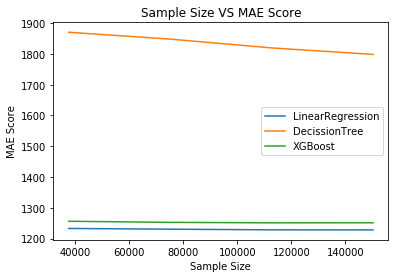

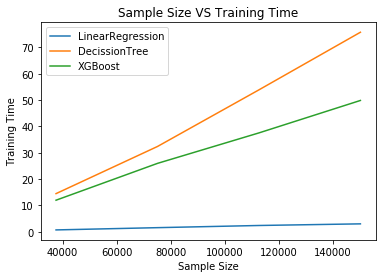

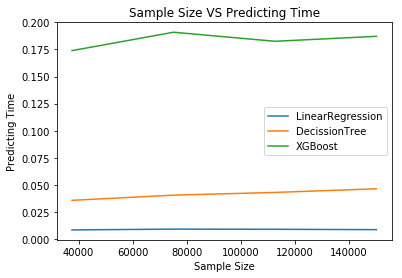

In [37]:
import matplotlib.pyplot as plt


mae = plt.figure(1)
plt.plot(data_linear_regression['sample'], data_linear_regression['mae_test'], label='LinearRegression')
plt.plot(data_decission_tree['sample'], data_decission_tree['mae_test'], label='DecissionTree')
plt.plot(data_xboost['sample'], data_xboost['mae_test'], label='XGBoost')
plt.legend()
plt.title("Sample Size VS MAE Score")
plt.xlabel('Sample Size')
plt.ylabel('MAE Score')
mae.show()

train_time = plt.figure(2)
plt.plot(data_linear_regression['sample'], data_linear_regression['train_time'], label='LinearRegression')
plt.plot(data_decission_tree['sample'], data_decission_tree['train_time'], label='DecissionTree')
plt.plot(data_xboost['sample'], data_xboost['train_time'], label='XGBoost')
plt.legend()
plt.title("Sample Size VS Training Time")
plt.xlabel('Sample Size')
plt.ylabel('Training Time')
train_time.show()

pred_time = plt.figure(3)
plt.plot(data_linear_regression['sample'], data_linear_regression['pred_time'], label='LinearRegression')
plt.plot(data_decission_tree['sample'], data_decission_tree['pred_time'], label='DecissionTree')
plt.plot(data_xboost['sample'], data_xboost['pred_time'], label='XGBoost')
plt.legend()
plt.title("Sample Size VS Predicting Time")
plt.xlabel('Sample Size')
plt.ylabel('Predicting Time')
pred_time.show()


#### Analysis + Trends
- Decission Tree Regression had highest MAE score (worst accuracy) than Linear Regression and XGBoost
- Descission Tree also took the most time to train the data, followed by XGBoost, and Linear Regression.
- XGBoost took the most time to predict the test data, followed by Decission Tree, and Linear Regression.
- As the number of samples increased, the MAE Score decreased indicating our algorithm is not underfitting.
- As the number of samples increased, training time increased linearly indicating the time to process more data.
- As the number of samples increased, predicting time remained constant for the most part.

From the results above, we can see that Decission Tree is neither fast nor accurate. However, XGBoost and LinearRegression are fairly promissing and we can continue our investigation by tweaking the params using Grid Search algorithm. 

### Refinement
In this section, we will fine tune params of the following two models: LinearRegression and XGBoost using sklearn's GridSearchCV module. 

#### Grid Search 


In [45]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression


# We need to set great_is_better to false because our goal is to minimize MAE
scorer = make_scorer(performance_metric, greater_is_better=False)

# Linear Regression
model = LinearRegression()
parameters = {'normalize': [True, False], 
              'n_jobs': [1, -1],
}

grid_obj = GridSearchCV(model, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

best_predictions_linear_regression = best_clf.predict(X_test)

print "LinearRegression Final MAE testing data: {:.4f}".format(performance_metric(y_test, best_predictions_linear_regression))
                                    



LinearRegression Final MAE testing data: 1228.0901


In [12]:
# This takes very long time to complete. I have saved the model in xgboost.pkl. Run the below cell to load this
# model and validate the findings.
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor


# We need to set great_is_better to false because our goal is to minimize MAE
scorer = make_scorer(performance_metric, greater_is_better=False)
# XGBoost
model = XGBRegressor()
print model.get_params().keys()
parameters = {'max_depth': [6, 7, 8], 
              'learning_rate': [0.03, .3, 1],
              'n_estimators': [100, 250, 500],
}

grid_obj = GridSearchCV(model, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf_xgboost = grid_fit.best_estimator_

best_predictions_xgboost = best_clf_xgboost.predict(X_test)

print "XGBRegressor Final MAE testing data: {:.4f}".format(performance_metric(y_test, best_predictions_xgboost))

['reg_alpha', 'colsample_bytree', 'silent', 'colsample_bylevel', 'scale_pos_weight', 'learning_rate', 'missing', 'max_delta_step', 'nthread', 'base_score', 'n_estimators', 'subsample', 'reg_lambda', 'seed', 'min_child_weight', 'objective', 'max_depth', 'gamma']
XGBRegressor Final MAE testing data: 1168.5284


## IV. Results

### Model Evaluation and Validation
We initally started off with three models: LinearRegression, DecissionTreeRegressor, and XGBRegressor. From those three, we have decided to DecissionTreeRegressor, but it was slow and not accurate. We used GridSearch to optimize the params for both LinearRegression and XGBRegressor. Linear Regressor didnot improve accuracy despite tweaking its params; however, it was very quick. On the other hand, XGBRegressor improved a lot, but took very very long time.

- Base Evaulation score: 1222.24
- Linear Regression: 1228.0901
- XGBRegressor: 1168.5284

In [25]:
# Run this block to load the XGBoost optimized model and predict the dependent variable
from sklearn.externals import joblib
#joblib.dump(best_clf_xgboost, 'xgboost.pkl') 

clf = joblib.load('xgboost.pkl')
print "XGBRegressor Final MAE Training data: {:.4f}".format(performance_metric(y_train, clf.predict(X_train)))
print "XGBRegressor Final MAE Testing data: {:.4f}".format(performance_metric(y_test, clf.predict(X_test)))

# Optimum Params used for this model
print "Optimum Params used for this model: \n"
print clf

XGBRegressor Final MAE Training data: 1000.0910
XGBRegressor Final MAE Testing data: 1178.2932
Optimum Params used for this model: 

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.03, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=nan, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


### Justification
We ran our most model again to predict the target variable: loss. Our model performed extremly well on training data as the MAE is rougly 1000. This is a lot better than our Base Evaluation Score of 1222.24. Simiarly, it did a great job in predicting unseen data as well. The MAE score on testing data was 1178.3, which was also better than the base evaluation score. This is indicating that our model is neither an underfitting nor a overfitting. If our model was underfitting, our MAE scores wouldn't be as high. Similarly, if our model was overfitting, our model would not have performed well on unseen test data. 

## V. Conclusion

### Free-Form Visualization

### Reflection

### Improvement


- https://www.kaggle.com/c/allstate-claims-severity
- http://asirt.org/initiatives/informing-road-users/road-safety-facts/road-crash-statistics
- http://scikit-learn.org/stable/supervised_learning.html
- https://en.wikipedia.org/wiki/Mean_absolute_error
- http://www.lauradhamilton.com/machine-learning-algorithm-cheat-sheet
- https://github.com/ctufts/Cheat_Sheets/wiki/Classification-Model-Pros-and-Cons
- https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms 
- http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- Previous Submissions: https://github.com/siddartha1992/machine-learning/tree/master/projects/
- https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/